In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# training and test data
train = pd.read_csv("../../../store-sales-time-series-forecasting/train.csv",index_col='id')
test = pd.read_csv("../../../store-sales-time-series-forecasting/test.csv",index_col='id')

holiday = pd.read_csv("../../../store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("../../../store-sales-time-series-forecasting/oil.csv",index_col='date')
trans = pd.read_csv("../../../store-sales-time-series-forecasting/transactions.csv",index_col='date')
stores = pd.read_csv("../../../store-sales-time-series-forecasting/stores.csv",index_col='store_nbr')


In [3]:
train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [4]:
#convert to date object explore data in day, month, and year
train.date = pd.to_datetime(train.date)
test.date= pd.to_datetime(test.date)

train['year'] = train.date.dt.year
test['year'] = test.date.dt.year

train['month'] = train.date.dt.month
test['month'] = test.date.dt.month

train['dayofmonth'] = train.date.dt.day
test['dayofmonth'] = test.date.dt.day

train['dayofweek'] = train.date.dt.dayofweek
test['dayofweek'] = test.date.dt.dayofweek

train['dayname'] = train.date.dt.strftime('%A')
test['dayname'] = test.date.dt.strftime('%A')

In [5]:
train

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname
id,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,Tuesday
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,Tuesday
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,Tuesday
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,Tuesday
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Tuesday
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Tuesday
3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Tuesday


In [7]:
import datetime

#using linear interplotate to filling in the gaps
oil = oil.interpolate(method='linear')
#use the row 1 for also row 0
oil.iloc[0] = oil.iloc[1]

start_date = train.date.min() 
# from beggining of the train date and the end of test date
number_of_days = 1704
date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]

date = (pd.Series(date_list)).to_frame()
date.columns = ['date']
date.date = pd.to_datetime(date.date)
date['date_str'] = date.date.astype(str)
oil['date_str'] = oil.index.astype(str)

oil = pd.merge(date,oil,how='left',on='date_str')
oil

,date,date_str,dcoilwtico
0,2013-01-01,2013-01-01,93.14
1,2013-01-02,2013-01-02,93.14
2,2013-01-03,2013-01-03,92.97
3,2013-01-04,2013-01-04,93.12
4,2013-01-05,2013-01-05,NaN
...,...,...,...
1699,2017-08-27,2017-08-27,NaN
1700,2017-08-28,2017-08-28,46.40
1701,2017-08-29,2017-08-29,46.46
1702,2017-08-30,2017-08-30,45.96


In [8]:
oil = oil.set_index('date').dcoilwtico.interpolate(method='linear').to_frame()
oil['date_str'] = oil.index.astype(str)
# add oil price to the train date
train['date_str'] = train.date.astype(str)
train = pd.merge(train,oil,how='left',on='date_str')
train.drop(columns='date_str',axis=1,inplace=True)
test['date_str'] = test.date.astype(str)
test = pd.merge(test,oil,how='left', on='date_str')

test.drop(columns='date_str',axis=1,inplace=True)
train

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,Tuesday,93.14
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,Tuesday,93.14
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,Tuesday,93.14
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,Tuesday,93.14
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,Tuesday,93.14
...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Tuesday,47.57
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Tuesday,47.57
3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Tuesday,47.57
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,Tuesday,47.57


In [9]:
#adding store data
train = pd.merge(train,stores,how='left',on='store_nbr')
test = pd.merge(test,stores,how='left',on='store_nbr')


In [10]:
train

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,dcoilwtico,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,Tuesday,93.14,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,Tuesday,93.14,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,Tuesday,93.14,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,Tuesday,93.14,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,Tuesday,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Tuesday,47.57,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Tuesday,47.57,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Tuesday,47.57,Quito,Pichincha,B,6
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,Tuesday,47.57,Quito,Pichincha,B,6


In [11]:
#data cleaning holidays

# transferred day are not actual holidays
holiday = holiday.query('transferred ==False')
holiday.description = holiday.description.str.replace('Traslado ','')

#national
national = holiday.query('locale=="National"')

day_off = national.query('type!="Work Day" or type!="Event"').set_index('date')['description'].to_dict()

train['date_str'] = train.date.astype(str)
test['date_str'] = test.date.astype(str)

# train['national_holiday'] = [1 if a in day_off else 0 for a in train.date_str]
# test['national_holiday'] = [1 if a in day_off else 0 for a in test.date_str]

event = national.query('type=="Event"').set_index('date')['description'].to_dict()

train['national_event'] =[1 if a in event else 0 for a in train.date_str]
test['national_event'] =[1 if a in event else 0 for a in test.date_str]

# #locale
# local = holiday.query('locale=="Local"')
# local_dic = local.set_index('date').locale_name.to_dict()
# train['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(train.city,train.date_str)]
# test['local_holiday']=[1 if b in local_dic and local_dic[b]== a else 0 for a,b in zip(test.city,test.date_str)]

# #Regional
# regional = holiday.query('locale=="Regional"')
# regional_dic = regional.set_index('date').locale_name.to_dict()
# train['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(train.state,train.date_str)]
# test['regional_holiday']= [1 if b in regional_dic and regional_dic[b]== a else 0 for a,b in zip(test.state,test.date_str)]

# work_day = national.query('type=="Work Day"').set_index('date')['description'].to_dict()
# train['national_workday'] = [1 if a in work_day else 0 for a in train.date_str]
# test['national_workday'] = [1 if a in work_day else 0 for a in test.date_str]

#weekend
train['weekend'] = [1 if a>=5 else 0 for a in train.dayofweek]
test['weekend'] = [1 if a>=5 else 0 for a in test.dayofweek]

In [12]:
holiday


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [15]:
train.columns #checking features

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayname', 'dcoilwtico', 'city', 'state',
       'type', 'cluster', 'date_str', 'national_holiday', 'national_event',
       'national_workday', 'weekend', 'local_holiday', 'regional_holiday'],
      dtype='object')

In [16]:
train

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,...,state,type,cluster,date_str,national_holiday,national_event,national_workday,weekend,local_holiday,regional_holiday
0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,Tuesday,...,Pichincha,D,13,2013-01-01,1,0,0,0,0,0
1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,Tuesday,...,Pichincha,D,13,2013-01-01,1,0,0,0,0,0
2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,Tuesday,...,Pichincha,D,13,2013-01-01,1,0,0,0,0,0
3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,Tuesday,...,Pichincha,D,13,2013-01-01,1,0,0,0,0,0
4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,Tuesday,...,Pichincha,D,13,2013-01-01,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,Tuesday,...,Pichincha,B,6,2017-08-15,0,0,0,0,0,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,Tuesday,...,Pichincha,B,6,2017-08-15,0,0,0,0,0,0
3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,Tuesday,...,Pichincha,B,6,2017-08-15,0,0,0,0,0,0
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,Tuesday,...,Pichincha,B,6,2017-08-15,0,0,0,0,0,0


In [91]:
train.sales = np.log1p(train.sales)

train['Istest'] = False
test['Istest'] = True

full = pd.concat((train,test))

full['Lag_16'] = full['sales'].shift(1782*16)
full['Lag_17'] = full['sales'].shift(1782*17)
full['Lag_18'] = full['sales'].shift(1782*18)
full['Lag_28'] = full['sales'].shift(1782*28)
full['Lag_31'] = full['sales'].shift(1782*31)

full['Lag_365'] = full['sales'].shift(1782*365)


train = full.query('Istest==False')
test = full.query('Istest ==True')
#drop na data
train = train.dropna(subset=['Lag_365'],axis=0)

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_2208/39302024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Istest'] = False
/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_2208/39302024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Istest'] = True


In [93]:
#try with lag features
FEATURES = ['store_nbr','family','onpromotion', 'year', 'month',
       'dayofmonth', 'dayofweek','dcoilwtico', 'city', 'state',
       'type', 'cluster', 'national_holiday', 'national_event',
       'national_workday', 'weekend', 'local_holiday', 'regional_holiday','Lag_16','Lag_17','Lag_18','Lag_28','Lag_31','Lag_365']
TARGET =['sales']

In [35]:
train

,date,store_nbr,family,sales,onpromotion,year,month,dayofmonth,dayofweek,dayname,...,Lag_16,Lag_17,Lag_18,Lag_19,Lag_20,Lag_21,Lag_22,Lag_28,Lag_31,Lag_365
1300860,2015-01-03,1,0,1.945910,0,2015,1,3,5,Saturday,...,2.079442,1.791759,0.000000,0.693147,1.386294,0.693147,1.609438,1.609438,1.386294,1.386294
1300861,2015-01-03,1,1,0.000000,0,2015,1,3,5,Saturday,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1300862,2015-01-03,1,2,0.693147,0,2015,1,3,5,Saturday,...,1.386294,1.609438,1.609438,1.098612,1.609438,0.693147,0.693147,0.693147,1.791759,1.945910
1300863,2015-01-03,1,3,6.844815,1,2015,1,3,5,Saturday,...,7.758761,7.775696,7.811568,6.948897,7.721349,7.608374,8.121777,7.642044,7.678789,7.833996
1300864,2015-01-03,1,4,0.000000,0,2015,1,3,5,Saturday,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,28,6.084802,0,2017,8,15,1,Tuesday,...,6.251732,6.056442,6.129802,5.689721,5.861063,5.771469,5.682538,5.772690,6.246746,6.083020
3000884,2017-08-15,9,29,5.046987,1,2017,8,15,1,Tuesday,...,4.986957,5.034293,4.177429,4.536217,4.062837,3.968006,4.528322,4.786883,4.972566,4.764462
3000885,2017-08-15,9,30,7.791824,148,2017,8,15,1,Tuesday,...,7.540934,7.462305,7.060684,7.038762,6.966046,7.650191,7.343800,7.686690,7.466486,7.424134
3000886,2017-08-15,9,31,4.804021,8,2017,8,15,1,Tuesday,...,3.737670,3.091042,1.791759,1.945910,1.386294,1.791759,1.098612,0.000000,1.098612,1.945910


In [94]:
from sklearn import preprocessing
categories = ['state','type','family','city']
for i in categories:
    encoder = preprocessing.LabelEncoder()
    train[i] = encoder.fit_transform(train[i])
    test[i] =  encoder.transform(test[i])

/var/folders/gq/sl2mfvl90yqcl70f27h7dqcc0000gn/T/ipykernel_2208/956627438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i] =  encoder.transform(test[i])


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train,train[TARGET],test_size=0.05,shuffle=False)

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

#creating linear regression model
linear = LinearRegression()
model = linear.fit(X_train[FEATURES],y_train)

#cross validation
cross_validation_mse_scores = cross_val_score(model, X_train[FEATURES], y_train, cv=10, scoring='neg_mean_squared_error')
cross_validation_mse_scores = -cross_validation_mse_scores

print(f'mean of cross-validation MSE scores: {np.sqrt(cross_validation_mse_scores)}')
print(f'mean of cross-validation MSE scores: {cross_validation_mse_scores.mean()}')
print(f'standard deviation of cross-validation MSE scores: {cross_validation_mse_scores.std()}')

predictions= model.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]

#convert numpy back to int to get score
a = []
for i in predictions:
    if i != 0:
        a.append(i.tolist()[0])
    else:
        a.append(i)
print('MSLE: ' + str(mean_squared_log_error(y_val,a)))
print('MAE: ',mean_squared_error(y_val,a))
print('R^2: ',r2_score(y_val,a))
# print('R^2: ',r2_score(y_val,predictions))
# y_val

mean of cross-validation MSE scores: [0.94399498 0.93243011 0.65023481 0.6901763  0.7379985  0.54483998
 0.60256412 0.62779566 0.73004435 0.596819  ]
mean of cross-validation MSE scores: 0.5147562051410353
standard deviation of cross-validation MSE scores: 0.19717543348354233
MSLE: 0.03987316525238751
MAE:  0.24204221153102945
R^2:  0.9623528500156491


In [81]:
# a=(predictions[61])
# a

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = XGBRegressor()

model.fit(X_train[FEATURES], y_train,
        eval_set=[(X_train[FEATURES],y_train),(X_val[FEATURES], y_val)], early_stopping_rounds=10)

cross_validation_mse_scores = cross_val_score(model, X_train[FEATURES], y_train, cv=10, scoring='neg_mean_squared_error')
cross_validation_mse_scores = -cross_validation_mse_scores

print(f'mean of cross-validation MSE scores: {np.sqrt(cross_validation_mse_scores)}')
print(f'mean of cross-validation MSE scores: {cross_validation_mse_scores.mean()}')
print(f'standard deviation of cross-validation MSE scores: {cross_validation_mse_scores.std()}')

#predictions have negative. Changed negative values to 0.
predictions= model.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ',mean_squared_log_error(y_val,predictions))
print('MSE: ',mean_squared_error(y_val,predictions))
print('R^2: ',r2_score(y_val,predictions))
# print(predictions[:5])
# print(y_val[:5])

/Users/jackiegan/.local/share/virtualenvs/CIS5526-P3FXNgu6/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


mean of cross-validation MSE scores: [0.85286984 0.76768752 0.53006352 0.53714577 0.80775715 0.47664428
 0.56684888 0.51338923 0.75509639 0.48630303]
mean of cross-validation MSE scores: 0.41574327465613264
standard deviation of cross-validation MSE scores: 0.1847304337787559
MSLE:  0.032681275246607557
MAE:  0.18844277297974596
R^2:  0.9706896855182386
[2.4732494, 6.8304644, 6.9160376, 5.320759, 5.1099887]
            sales
2915886  3.178054
2915887  6.941190
2915888  7.131699
2915889  5.439040
2915890  5.123964


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

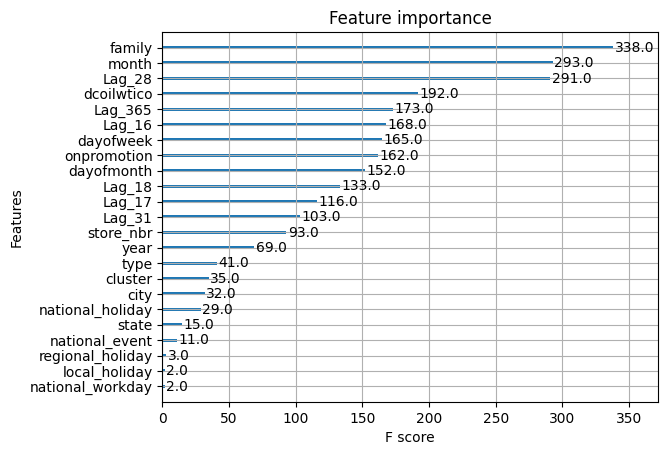

In [41]:
xgb.plot_importance(model)

In [79]:
print("Accuracy: %.2f%% (%.2f%%)" % (cross_validation_mse_scores.mean()*100, cross_validation_mse_scores.std()*100))

Accuracy: 51.48% (19.72%)


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create an instance of the DecisionTreeRegressor class.
model = DecisionTreeRegressor()

model.fit(X_train[FEATURES], y_train)

cross_validation_mse_scores = cross_val_score(model, X_train[FEATURES], y_train, cv=10, scoring='neg_mean_squared_error')
cross_validation_mse_scores = -cross_validation_mse_scores

print(f'mean of cross-validation MSE scores: {np.sqrt(cross_validation_mse_scores)}')
print(f'mean of cross-validation MSE scores: {cross_validation_mse_scores.mean()}')
print(f'standard deviation of cross-validation MSE scores: {cross_validation_mse_scores.std()}')

# predictions = model.predict(X_val[F])

#predictions have negative. Changed negative values to 0.
predictions= model.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ',mean_squared_log_error(y_val,predictions))
print('MSE: ',mean_squared_error(y_val,predictions))
print('R^2: ',r2_score(y_val,predictions))

mean of cross-validation MSE scores: [1.18822892 1.01536448 0.73567836 0.79901561 1.18303506 0.72416599
 0.78285629 0.77345565 1.0907293  0.72480639]
mean of cross-validation MSE scores: 0.847262222697795
standard deviation of cross-validation MSE scores: 0.3517020342845848
MSLE:  0.07321117876216676
MSE:  0.43372483127116496
R^2:  0.9325386110483892


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestRegressor()

model.fit(X_train[FEATURES], y_train.values.ravel())

# cross_validation_mse_scores = cross_val_score(model, X_train[FEATURES], y_train, cv=10, scoring='neg_mean_squared_error')
# cross_validation_mse_scores = -cross_validation_mse_scores

# print(f'mean of cross-validation MSE scores: {np.sqrt(cross_validation_mse_scores)}')
# print(f'mean of cross-validation MSE scores: {cross_validation_mse_scores.mean()}')
# print(f'standard deviation of cross-validation MSE scores: {cross_validation_mse_scores.std()}')

#predictions have negative. Changed negative values to 0.
predictions= model.predict(X_val[FEATURES])
predictions = [a if a>0 else 0 for a in predictions]
print('MSLE: ',mean_squared_log_error(y_val,predictions))
print('MSE: ',mean_squared_error(y_val,predictions))
print('R^2: ',r2_score(y_val,predictions))